# K- nearest Neighbours

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from copy import deepcopy

In [18]:
from sklearn import datasets
dataset = pd.DataFrame(datasets.load_iris()["data"],columns=datasets.load_iris()["feature_names"])
data = dataset.as_matrix()
dataset["label"] = pd.DataFrame(datasets.load_iris()["target"])
labels = datasets.load_iris()["target"]
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
print datasets.load_iris()['DESCR']

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

<IPython.core.display.Javascript object>


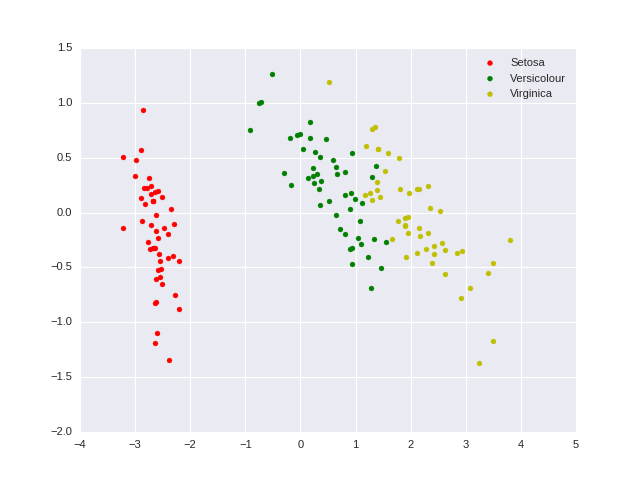

In [19]:
#We shrink the dataset to visualize the three classes!
#We see that the two clusters Versicolour and Virginica are very near.
#We will apply K-NN on the original dataset and find the classificaiton of every point! 
%matplotlib notebook
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
shrink = PCA(n_components = 2)
data_2d = shrink.fit_transform(data)
setosa_data_2d = data_2d[0:50,:]
verico_data_2d = data_2d[50:100,:]
virginia_data_2d = data_2d[100:150,:]
plt.scatter(setosa_data_2d[:,0],setosa_data_2d[:,1],color = 'r',label = "Setosa")
plt.scatter(verico_data_2d[:,0],verico_data_2d[:,1],color = 'g',label = 'Versicolour')
plt.scatter(virginia_data_2d[:,0],virginia_data_2d[:,1],color = 'y',label = "Virginica")
plt.legend()

## K-NN 
It is a classification and regression algorithm which uses distances and similarities as a measure of decision making.<br>
It approximates the test point as a function of k-nearest known datapoints.

I will calculate the distace of test point to each point and see the nearest k points. They will vote to determine the class of the test point. The different ways to vote are
1. Votes are equal. class_pred = max occuring class in k nearest neighbours 
2. Votes are weighted by the distance of neighbours from test point


In [5]:
def euclidean_distance(p1,p2):
    dif = p1 - p2
    return np.square(dif).sum(axis = 1)

In [6]:
#Testdata one random 
testdata1 = np.array([4.3,3.9,1.5,0.5])
def knn(data,testdata,k):
    #we calculate distance of test point to data points in the dataset
    point_distance = euclidean_distance(testdata,data)

    #Now we find the position of top k nearest elements
    neighbours = np.argpartition(point_distance,k)[:k]

    return point_distance,neighbours

#0 for majority voting
#1 for weighted voting

def classify(neighbours,labels,method = 0):
    classes = labels[neighbours]
    if method == 0:
        vote_count = np.bincount(classes)
        deciding_label = np.argmax(vote_count)
        return deciding_label

#Untested 
    """elif method == 1:
        types_of_class = np.unique(labels)
        weights = np.array([1./i for i in range(1,neighbours.shape[0]+1)])
        count_store = np.zeros(types_of_class.shape[0])
        vote_count = np.zeros(types_of_class)
        for i in range(types_of_class.shape[0]):
            
            count_store[i] = np.where(labels[neighbours] == i,weights,np.zeros(weights.shape[0]) )
            vote_count[i] = count_store[i].sum() 
        deciding_label = np.argmax(vote_count)
        return deciding_label"""

In [7]:
dist,neighbours = knn(data,testdata1,5)
classify(neighbours,labels,method = 0)

0

In [8]:
testdata2 = np.array([5.2,  2.7,  3.9,  1.4])
dist, neighbours = knn(testdata2,data,5)
print neighbours,"\n",dist[neighbours]

[59 53 89 94 80] 
[ 0.    0.27  0.15  0.26  0.28]


In [9]:
#Plotting the results for classification
#for this we are splitting the data into training and testing
#train:test = 0.6:0.4
train = dataset.sample(frac=0.6,random_state=200)
test = dataset.drop(train.index)

trainlabel = train["label"]
train = train.drop("label",axis = 1)
train = train.as_matrix()
trainlabel = trainlabel.as_matrix()

In [10]:
teslabel = test["label"]
test = test.drop("label",axis = 1)
test = test.as_matrix()
teslabel = teslabel.as_matrix()

In [11]:
prediction = np.zeros(test.shape[0])
k = 5
for index,testpoint in enumerate(test):
    _,neighbours = knn(train,testpoint,k)
    prediction[index] = classify(neighbours,trainlabel)

<IPython.core.display.Javascript object>


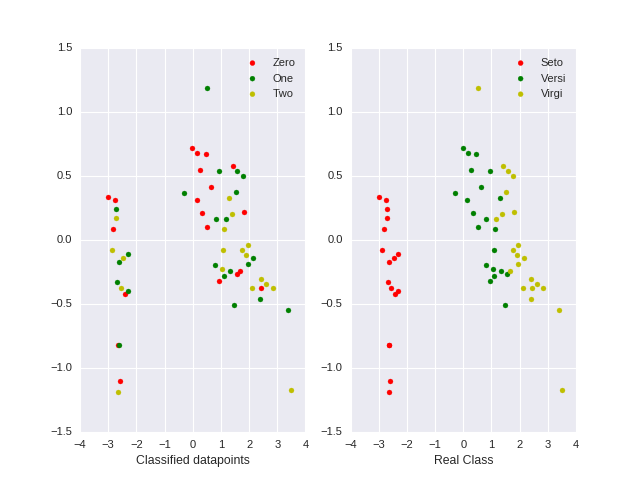

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()
data_2d = shrink.transform(test)
data = deepcopy(test)
zero_data_2d = np.array([data_2d[i] for i in range(data.shape[0]) if prediction[i] == 0 ])
one_data_2d = np.array([data_2d[i] for i in range(data.shape[0]) if prediction[i] == 1 ])
two_data_2d = np.array([data_2d[i] for i in range(data.shape[0]) if prediction[i] == 2 ])


ax = fig.add_subplot(1,2,1)
ax.scatter(zero_data_2d[:,0],zero_data_2d[:,1],color = 'r',label = "Zero")
ax.scatter(one_data_2d[:,0],one_data_2d[:,1],color = 'g',label = 'One')
ax.scatter(two_data_2d[:,0],two_data_2d[:,1],color = 'y',label = "Two")
ax.legend()
ax.set_xlabel("Classified datapoints")

setosa_data_2d = np.array([data_2d[i] for i in range(data.shape[0]) if teslabel[i] == 0 ])
verico_data_2d =  np.array([data_2d[i] for i in range(data.shape[0]) if teslabel[i] == 1 ])
virginia_data_2d =  np.array([data_2d[i] for i in range(data.shape[0]) if teslabel[i] == 2 ])

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(setosa_data_2d[:,0],setosa_data_2d[:,1],color = 'r',label = "Seto")
ax2.scatter(verico_data_2d[:,0],verico_data_2d[:,1],color = 'g',label = 'Versi')
ax2.scatter(virginia_data_2d[:,0],virginia_data_2d[:,1],color = 'y',label = "Virgi")
ax2.legend()
ax2.set_xlabel("Real Class")

In [13]:
#trying to classify train set using test set! 
prediction = np.zeros(train.shape[0])
k = 5
for index,testpoint in enumerate(train):
    _,neighbours = knn(test,testpoint,k)
    prediction[index] = classify(neighbours,teslabel)

<IPython.core.display.Javascript object>


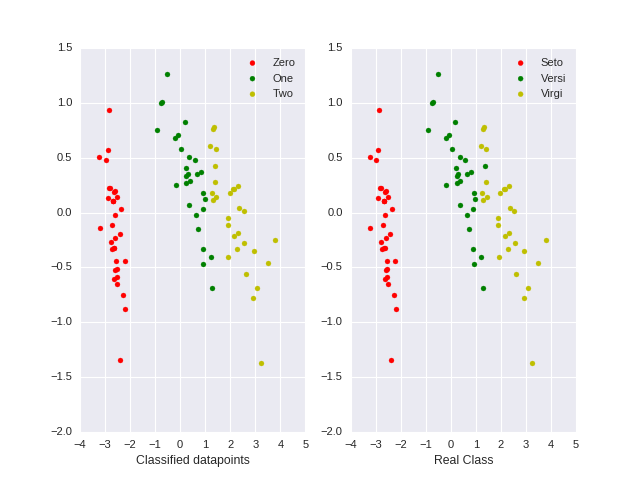

In [14]:
##Plotting the predictions
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()
data_2d = shrink.transform(train)
data = deepcopy(train)
zero_data_2d = np.array([data_2d[i] for i in range(data.shape[0]) if prediction[i] == 0 ])
one_data_2d = np.array([data_2d[i] for i in range(data.shape[0]) if prediction[i] == 1 ])
two_data_2d = np.array([data_2d[i] for i in range(data.shape[0]) if prediction[i] == 2 ])


ax = fig.add_subplot(1,2,1)
ax.scatter(zero_data_2d[:,0],zero_data_2d[:,1],color = 'r',label = "Zero")
ax.scatter(one_data_2d[:,0],one_data_2d[:,1],color = 'g',label = 'One')
ax.scatter(two_data_2d[:,0],two_data_2d[:,1],color = 'y',label = "Two")
ax.legend()
ax.set_xlabel("Classified datapoints")

setosa_data_2d = np.array([data_2d[i] for i in range(data.shape[0]) if trainlabel[i] == 0 ])
verico_data_2d =  np.array([data_2d[i] for i in range(data.shape[0]) if trainlabel[i] == 1 ])
virginia_data_2d =  np.array([data_2d[i] for i in range(data.shape[0]) if trainlabel[i] == 2 ])

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(setosa_data_2d[:,0],setosa_data_2d[:,1],color = 'r',label = "Seto")
ax2.scatter(verico_data_2d[:,0],verico_data_2d[:,1],color = 'g',label = 'Versi')
ax2.scatter(virginia_data_2d[:,0],virginia_data_2d[:,1],color = 'y',label = "Virgi")
ax2.legend()
ax2.set_xlabel("Real Class")